In [10]:
!python -m pip install prophet

14:24:27 - cmdstanpy - INFO - Chain [1] start processing
14:24:28 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 29266860.94
MAPE: 60.80%


/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/rspn/miniconda3/envs/ml/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of a

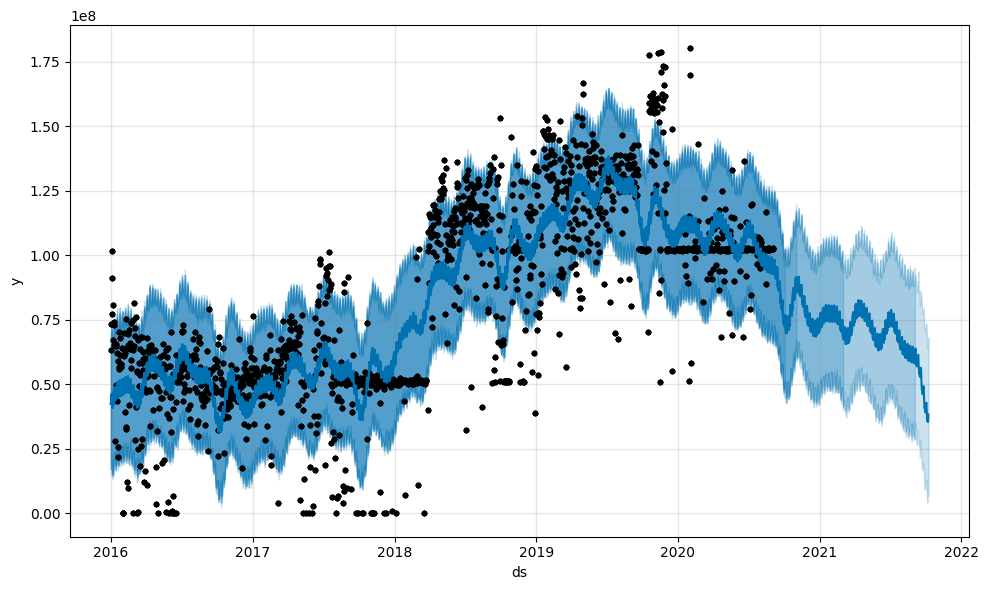

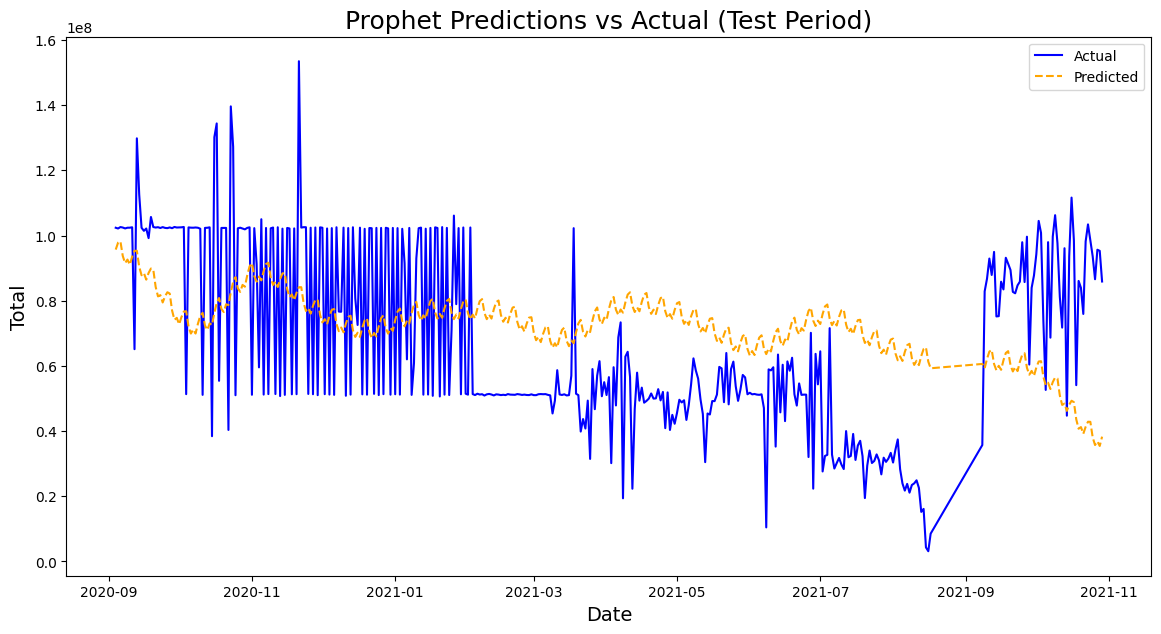

In [14]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Gasoline.csv')

# Prepare data
data = df.rename(columns={'Tanggal': 'ds', 'Jumlah': 'y'})
data['ds'] = pd.to_datetime(data['ds'])  # Ensure ds is in datetime format
data = data[['ds', 'y']]

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Create and fit the model with parameter adjustments
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust as needed
    holidays_prior_scale=10,  # Adjust as needed
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
)
model.fit(train)

# Make predictions for the test set
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)

# Extracting predicted values
y_pred = forecast['yhat'].tail(len(test)).values

# Evaluate the model
y_true = test['y'].values
rmse = sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print RMSE and MAPE
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Plot the actual vs predicted values
fig = model.plot(forecast)

# Extend the period for future predictions
future_extended = model.make_future_dataframe(periods=365)
forecast_extended = model.predict(future_extended)

# Extracting predicted values for the extended period
y_pred_extended = forecast_extended['yhat'].tail(365).values

# Plot the extended predictions
fig = model.plot(forecast_extended, ax=fig.gca(), plot_cap=False)

# Additional predictions for 30, 60, and 180 days
days_to_predict = [30, 60, 180]
for days in days_to_predict:
    future_additional = model.make_future_dataframe(periods=days)
    forecast_additional = model.predict(future_additional)
    y_pred_additional = forecast_additional['yhat'].tail(days).values
    fig = model.plot(forecast_additional, ax=fig.gca(), plot_cap=False)

# Separate plot for predictions
plt.figure(figsize=(14, 7))
plt.plot(data['ds'][-len(test):], y_true, label='Actual', color='blue')
plt.plot(test['ds'], y_pred, label='Predicted', linestyle='--', color='orange')
plt.title('Prophet Predictions vs Actual (Test Period)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.legend()
plt.show()
